# 📊 ABC Company Employee Analysis – Python Module  Project


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
df = pd.read_excel("ABC Company.xlsx")

# View the first few rows
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


### Correct the data in the "height" column by replacing it with random numbers between 150 and 180.

In [110]:
np.random.seed(42) 
df["height"] = np.random.randint(150, 181, size=len(df))

df["height"].head()


0    156
1    169
2    178
3    164
4    160
Name: height, dtype: int32

In [111]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,156
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,178
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,164
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,160


### Handling missing values in college&height column

In [113]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64

In [114]:
df['College'] = df['College'].fillna('Unknown')

In [115]:
print(df['College'].isna().sum())

0


In [116]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,156
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,178
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,164
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,Unknown,5000000.0,160


In [117]:
print("Missing salaries:", df['Salary'].isna().sum())


Missing salaries: 11


In [118]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())



In [119]:
print("Missing salaries:", df['Salary'].isna().sum())


Missing salaries: 0


### Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

                        Count  Percent
Team                                  
New Orleans Pelicans       19     4.15
Memphis Grizzlies          18     3.93
Utah Jazz                  16     3.49
New York Knicks            16     3.49
Milwaukee Bucks            16     3.49
Brooklyn Nets              15     3.28
Portland Trail Blazers     15     3.28
Oklahoma City Thunder      15     3.28
Denver Nuggets             15     3.28
Washington Wizards         15     3.28
Miami Heat                 15     3.28
Charlotte Hornets          15     3.28
Atlanta Hawks              15     3.28
San Antonio Spurs          15     3.28
Houston Rockets            15     3.28
Boston Celtics             15     3.28
Indiana Pacers             15     3.28
Detroit Pistons            15     3.28
Cleveland Cavaliers        15     3.28
Chicago Bulls              15     3.28
Sacramento Kings           15     3.28
Phoenix Suns               15     3.28
Los Angeles Lakers         15     3.28
Los Angeles Clippers     

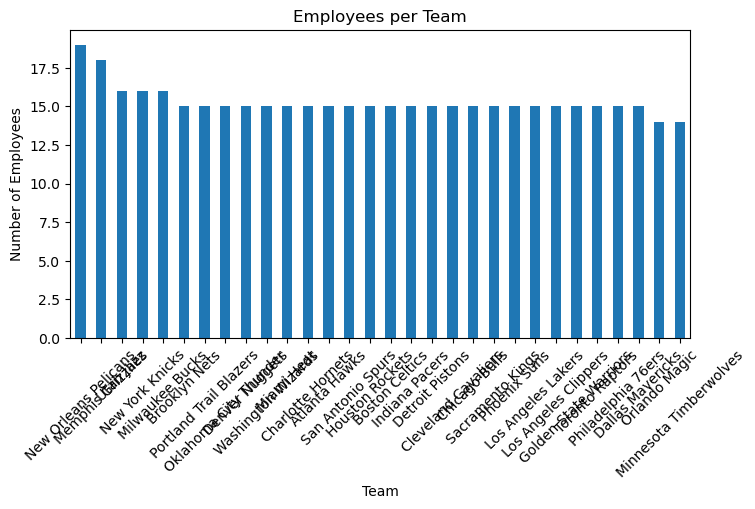

In [148]:
team_counts = df['Team'].value_counts()
team_percent = team_counts / len(df) * 100

# Show as table
team_df = pd.DataFrame({'Count': team_counts, 'Percent': team_percent.round(2)})
print(team_df)

# Plot bar chart
team_counts.plot(kind='bar', figsize=(8,4), title='Employees per Team')
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()


### Segregate employees based on their positions within the company.

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


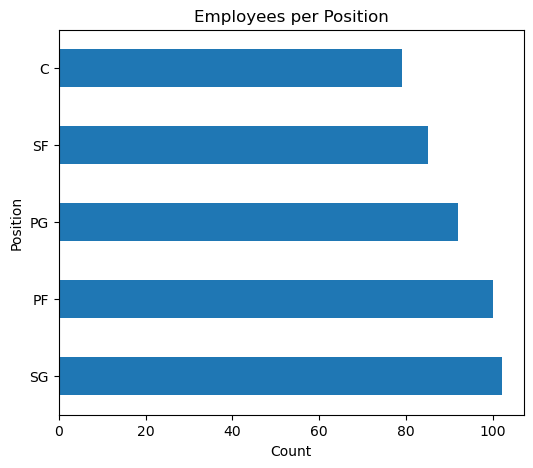

In [123]:
position_counts = df['Position'].value_counts()

# Show table
print(position_counts)

# Bar chart
position_counts.plot(kind='barh', figsize=(6,5), title='Employees per Position')
plt.xlabel("Count")
plt.show()


### Predominant Age Group

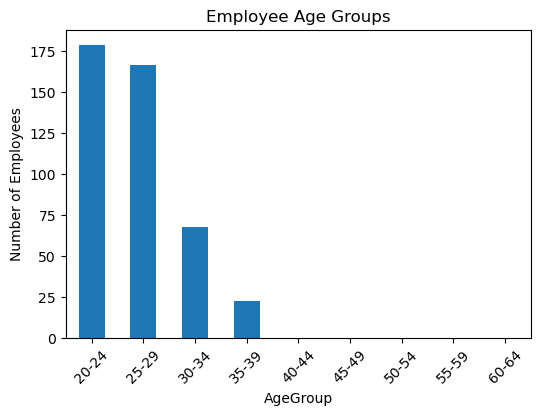

Most common age group: 20-24


In [125]:
# Create age groups
bins = range(20, 66, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count per age group
age_counts = df['AgeGroup'].value_counts().sort_index()

# Plot
age_counts.plot(kind='bar', figsize=(6,4), title="Employee Age Groups")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

print("Most common age group:", age_counts.idxmax())


### Highest Salary Expense by Team and Position

Top 5 Teams by Salary:
 Team
Cleveland Cavaliers      1.118227e+08
Memphis Grizzlies        9.588676e+07
Los Angeles Clippers     9.485464e+07
Oklahoma City Thunder    9.376530e+07
Miami Heat               9.218361e+07
Name: Salary, dtype: float64

Top 5 Positions by Salary:
 Position
C     4.663773e+08
PG    4.661848e+08
PF    4.570628e+08
SF    4.128549e+08
SG    4.114782e+08
Name: Salary, dtype: float64


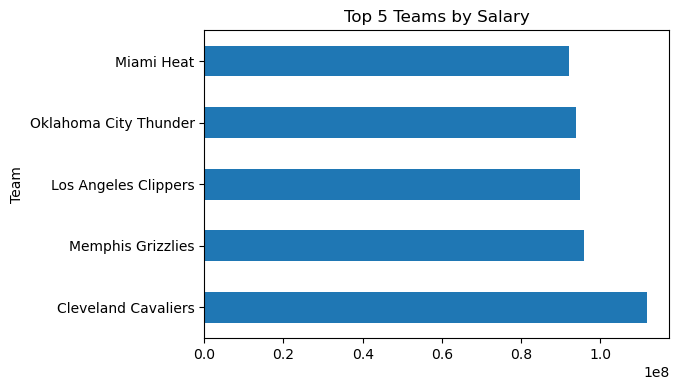

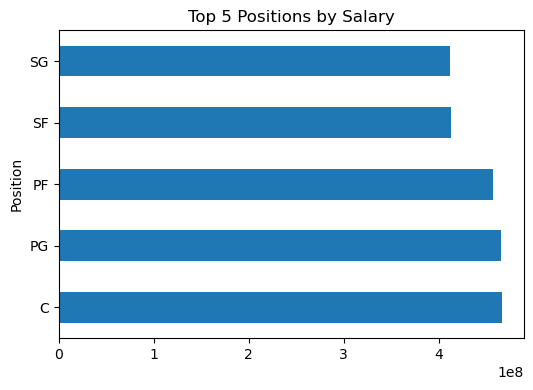

In [127]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
pos_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Show top 5
print("Top 5 Teams by Salary:\n", team_salary.head())
print("\nTop 5 Positions by Salary:\n", pos_salary.head())

# Plot
team_salary.head(5).plot(kind='barh', title="Top 5 Teams by Salary", figsize=(6,4))
plt.show()

pos_salary.head(5).plot(kind='barh', title="Top 5 Positions by Salary", figsize=(6,4))
plt.show()


### age v/s salary correlation

Correlation between Age and Salary: 0.21


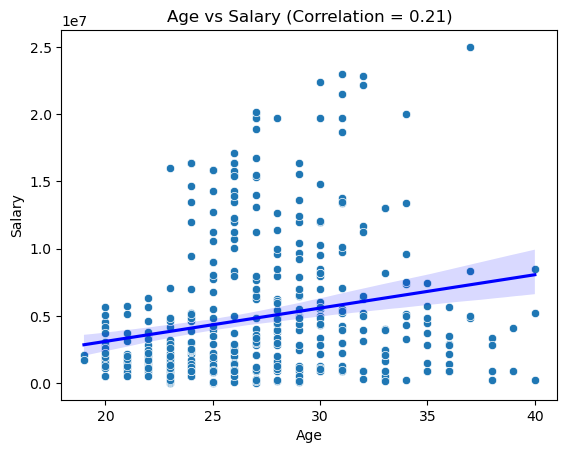

In [129]:
# Calculate correlation
corr = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", round(corr, 2))

# Scatter plot
sns.scatterplot(data=df, x='Age', y='Salary')
sns.regplot(data=df, x='Age', y='Salary', scatter=False, color='blue')
plt.title(f"Age vs Salary (Correlation = {corr:.2f})")
plt.show()


# ABC Company – Employee Data Analysis  
Module 4 – Data Story (June 2025)  
By: Salman

---

## 1. Introduction

This project analyzes employee data from ABC Company. The dataset contains 458 employee records, including information like age, position, team, college, and salary. The goal of the project is to clean the data, analyze trends, and summarize insights using Python libraries like NumPy, Pandas, Matplotlib, and Seaborn.

---

## 2. Dataset Overview

- Total records: 458  
- Main columns: Name, Age, Height, Position, Team, College, Salary  

### Data Cleaning Steps:
- Replaced missing or unrealistic height values  
- Filled missing college names with "Unknown"  
- Converted salary values to numeric format  
- Removed duplicate rows

---

## 3. Analysis and Observations

### 3.1 Employees by Team  
- New Orleans Pelicans have the most employees  
- Memphis Grizzlies come next  
- Other teams have a fairly even number of employees

### 3.2 Employees by Position  
- Most employees are Shooting Guards (SG)  
- Power Forwards (PF) and Point Guards (PG) are also common  
- Fewer employees are Centers (C) and Small Forwards (SF)

### 3.3 Age Distribution  
- Most employees are between 20 and 24 years old  
- The company has a young workforce in the early stages of their careers

### 3.4 Top 5 Teams by Total Salary  
1. Cleveland Cavaliers  
2. Memphis Grizzlies  
3. Los Angeles Clippers  
4. Oklahoma City Thunder  
5. Miami Heat

### 3.5 Top 5 Positions by Total Salary  
1. Center (C)  
2. Point Guard (PG)  
3. Power Forward (PF)  
4. Small Forward (SF)  
5. Shooting Guard (SG)

### 3.6 Age and Salary Correlation  
- The correlation between age and salary is 0.21  
- This is a weak positive correlation, meaning older employees tend to earn slightly more, but the difference is small

---

## 4. Key Insights

| Area              | Insight |
|-------------------|---------|
| Team Size         | Pelicans and Grizzlies have the most employees |
| Common Positions  | SG, PF, and PG are the most common roles |
| Age Range         | Most employees are between 20 and 24 years old |
| Top Salaries by Team | Cavaliers have the highest total salary |
| Top Salaries by Position | Centers earn the most overall |
| Age vs Salary     | Weak positive relationship (correlation = 0.21) |

---

## 5. Recommendations

- Hire more employees in less common roles like Centers and Small Forwards to balance the team  
- Review salaries for Centers to ensure they match performance  
- Provide mentorship or training programs to support the younger workforce  
- In future, collect performance and timeline data for deeper analysis

---

## 6. Limitations

- The data is from one point in time (no timeline or trend data)  
- NBA-style team and position names may be symbolic, not actual roles  
- Salary does not include bonuses or other compensation

---

## 7. Conclusion

This analysis gave a better understanding of ABC Company's workforce. The company has a young team with certain positions more common than others. There is room to balance hiring and review high salary roles. These insights can help guide better planning and team structure.

